Predicting ...


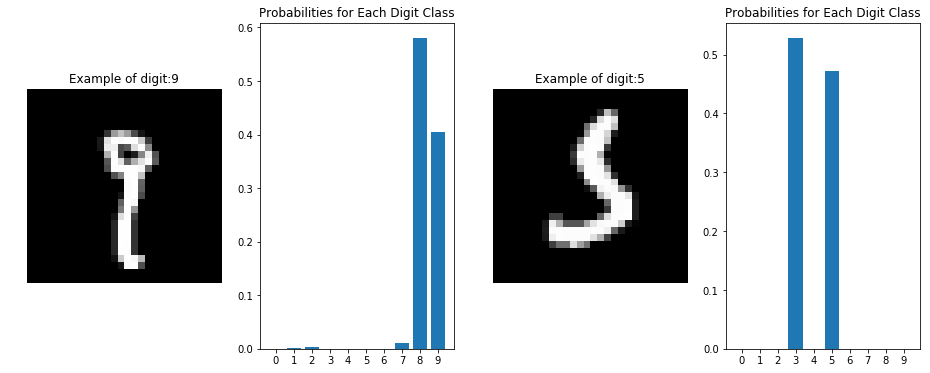

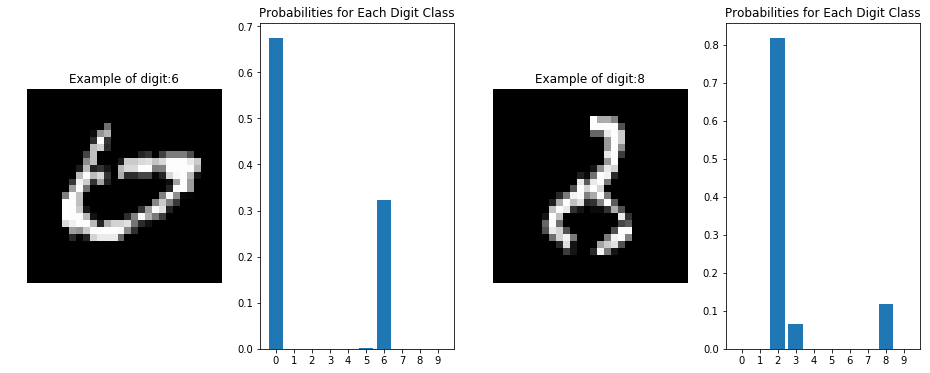

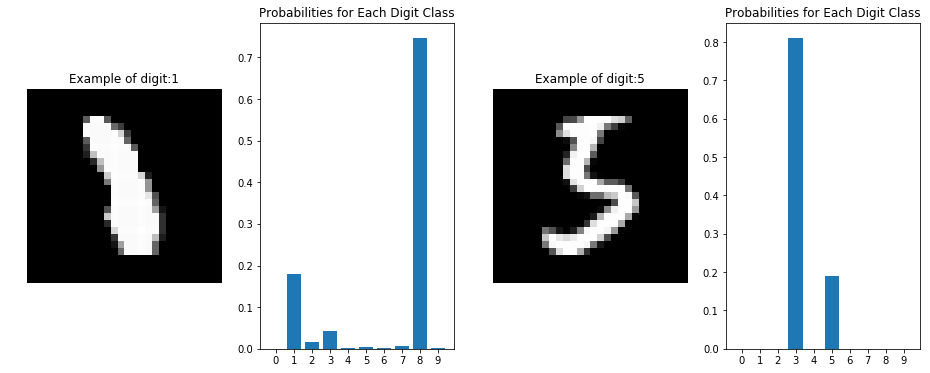

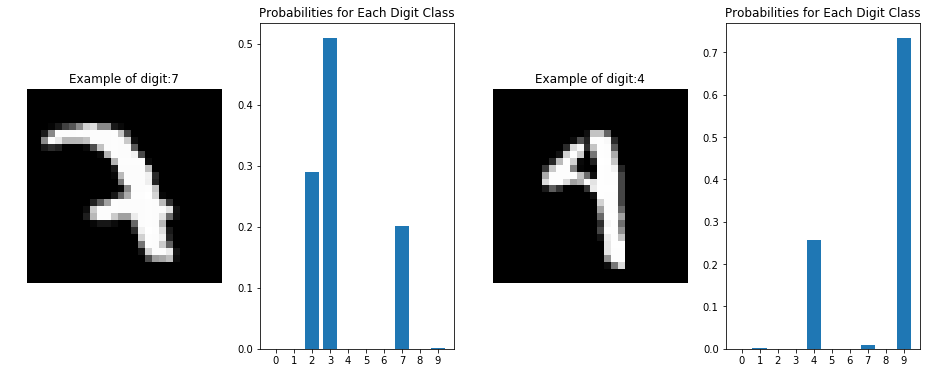

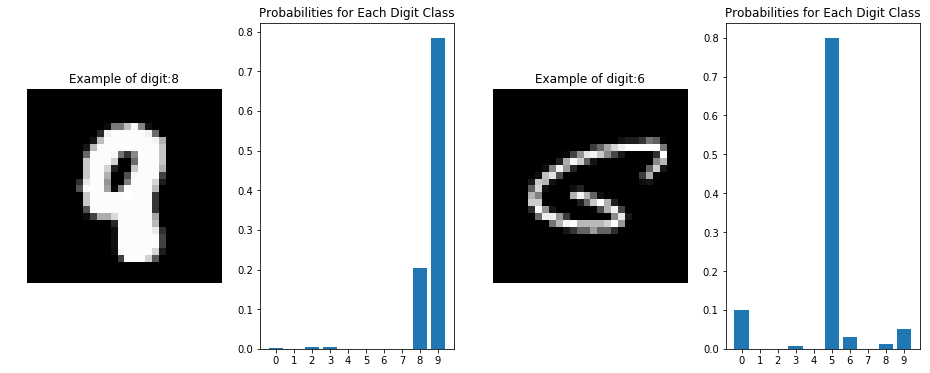

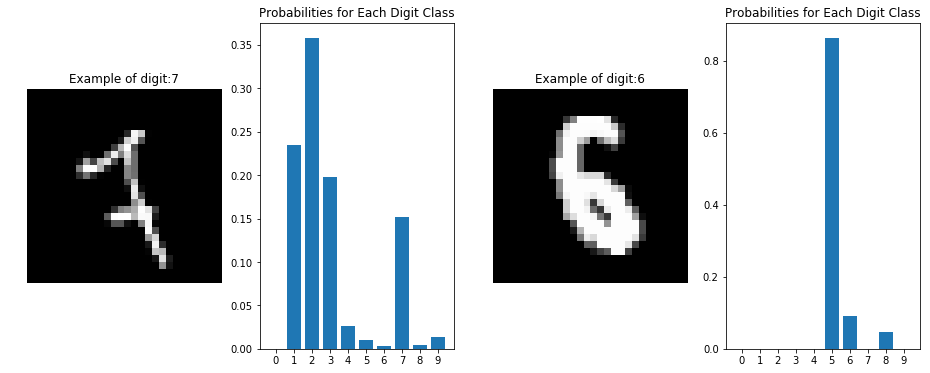

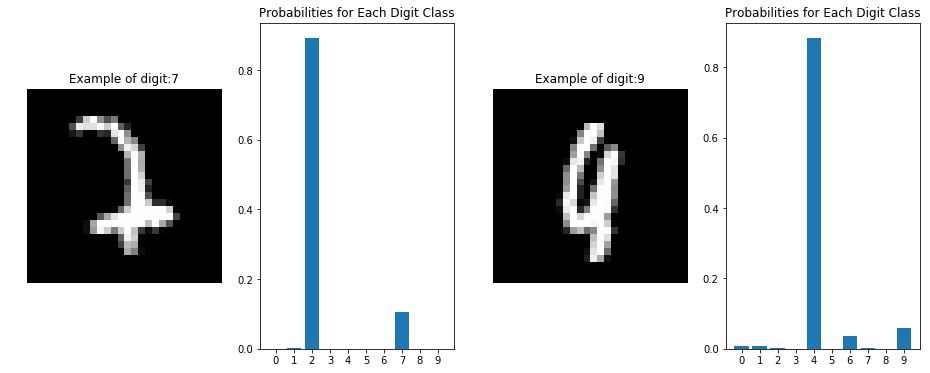

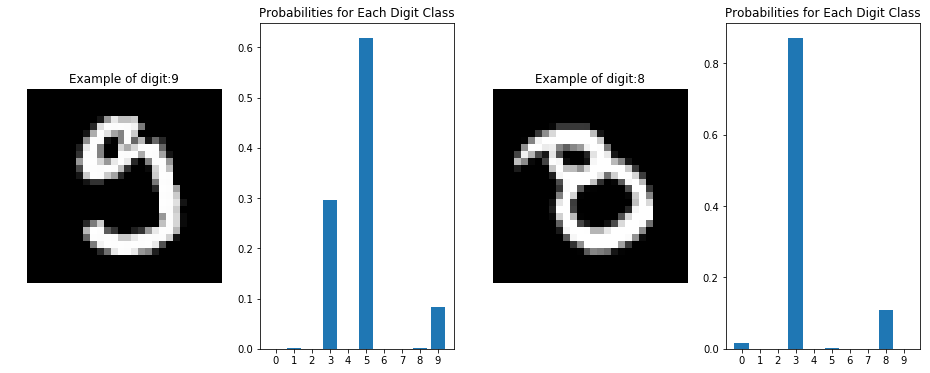

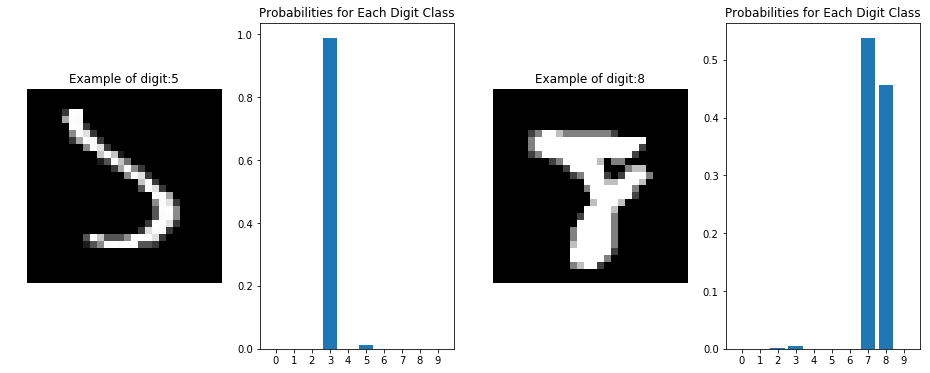

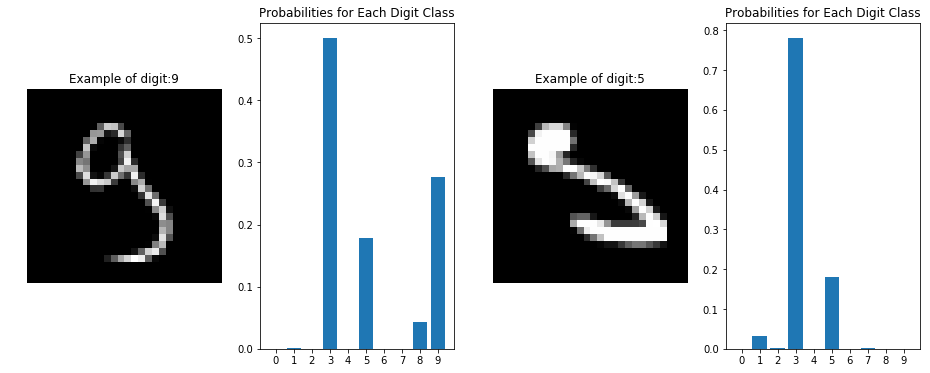

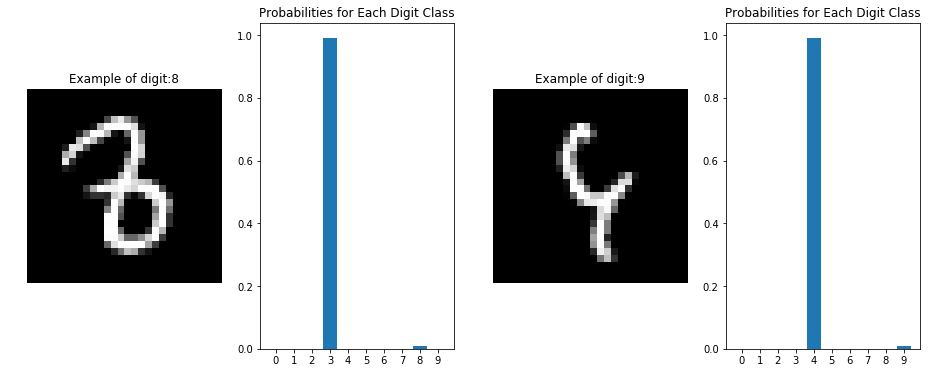

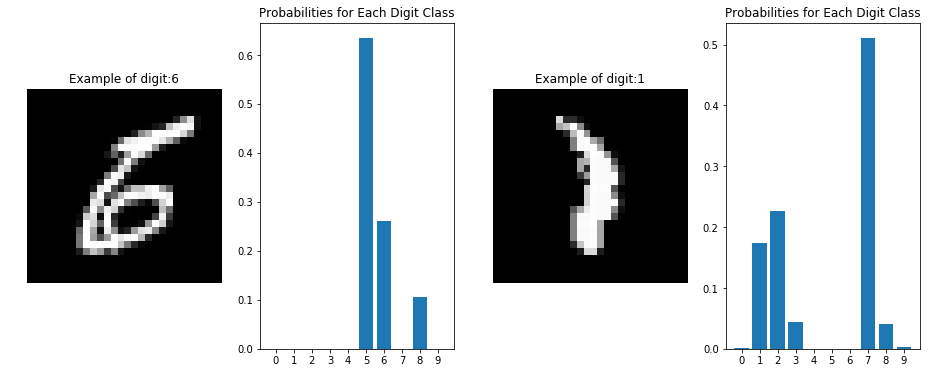

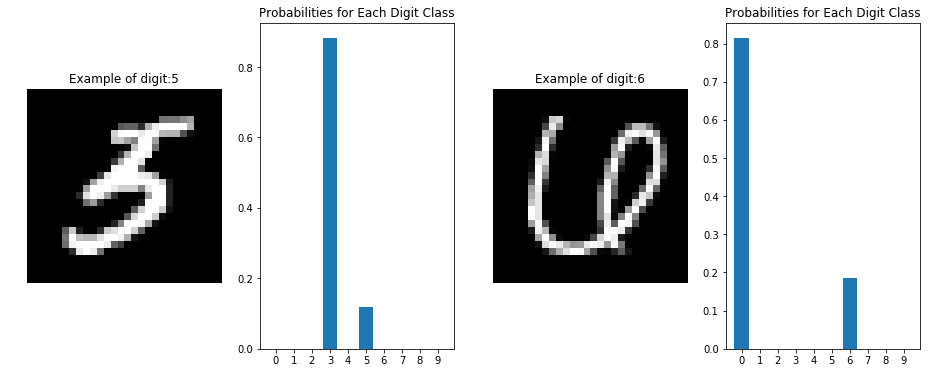

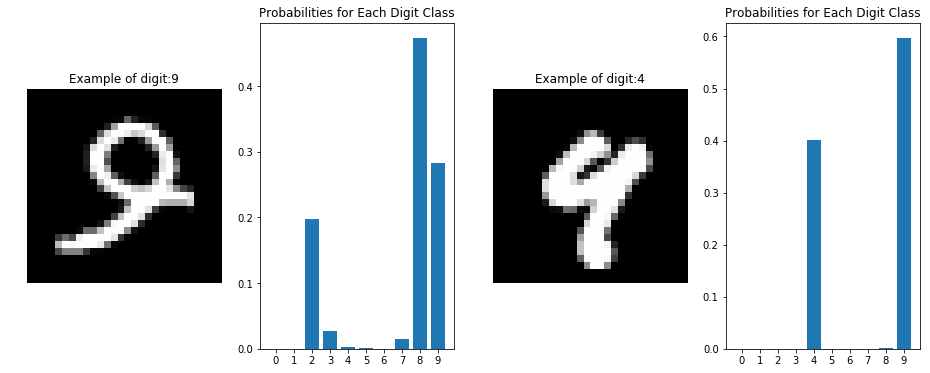

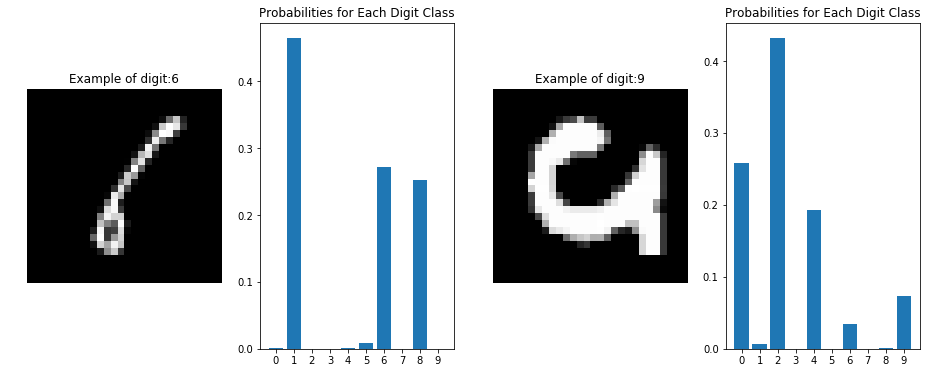

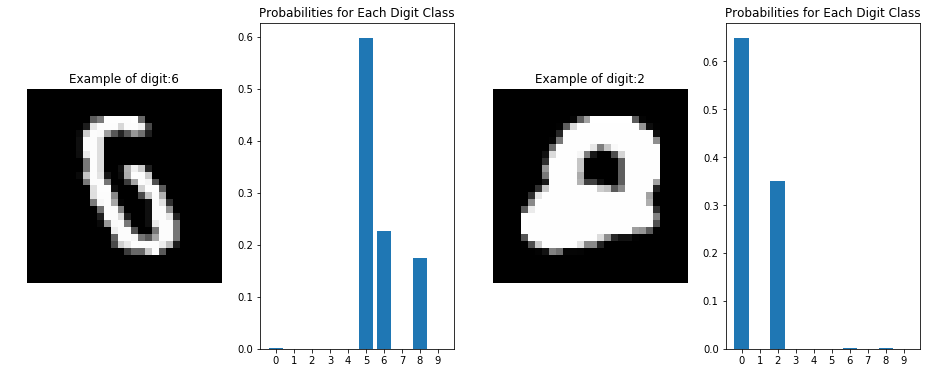

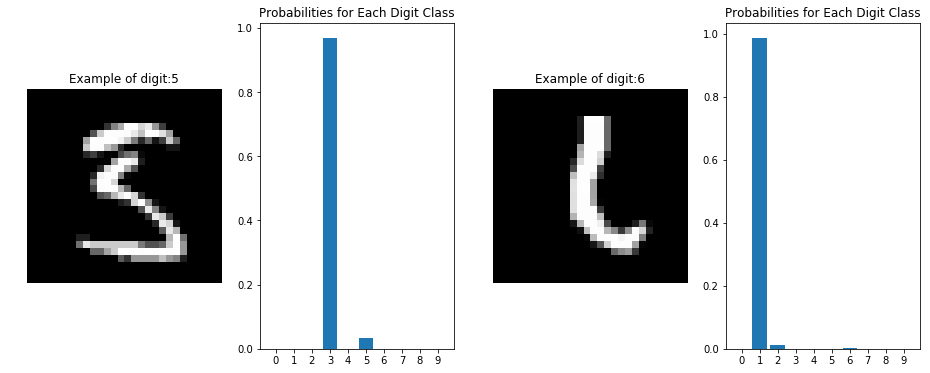

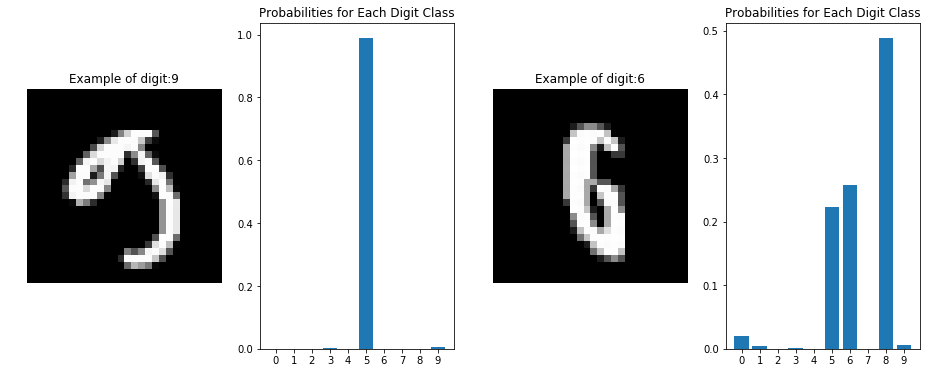

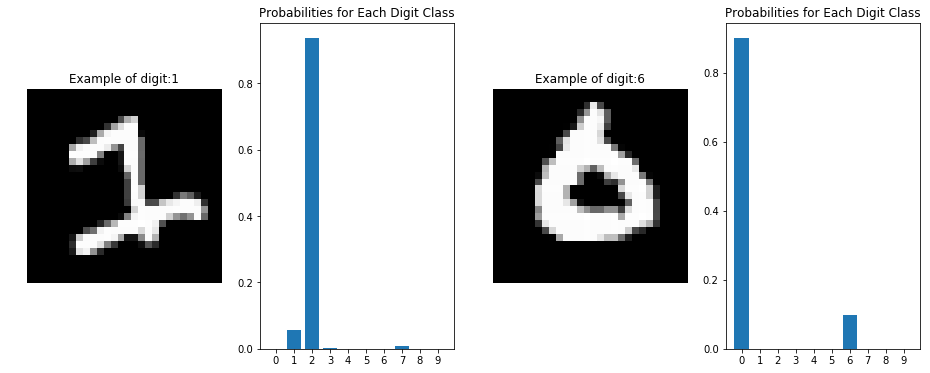

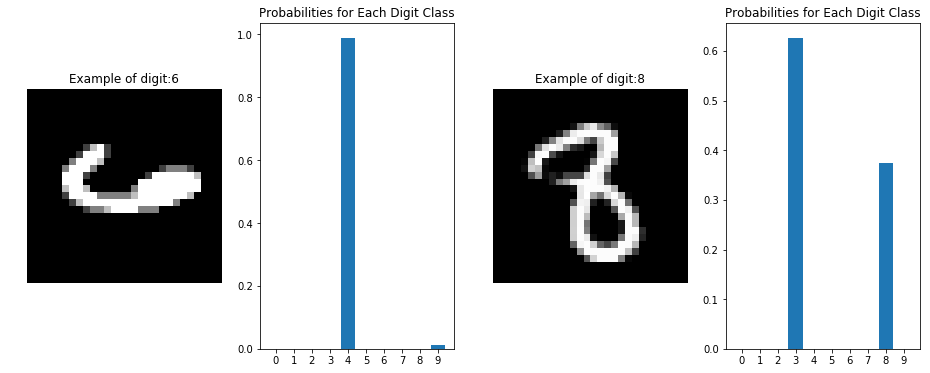

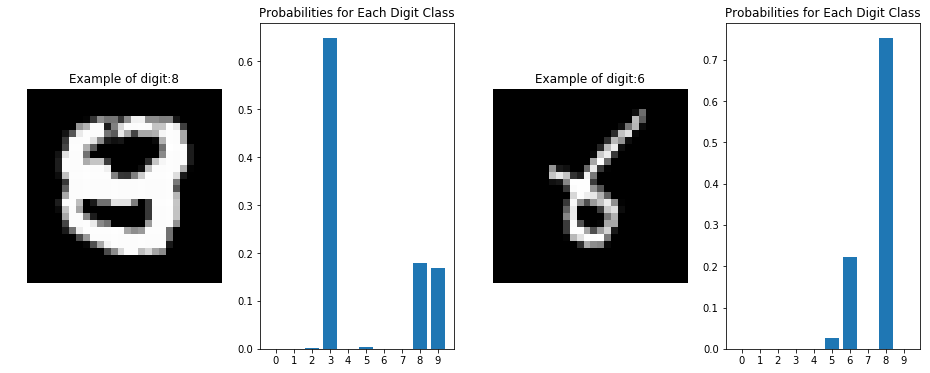

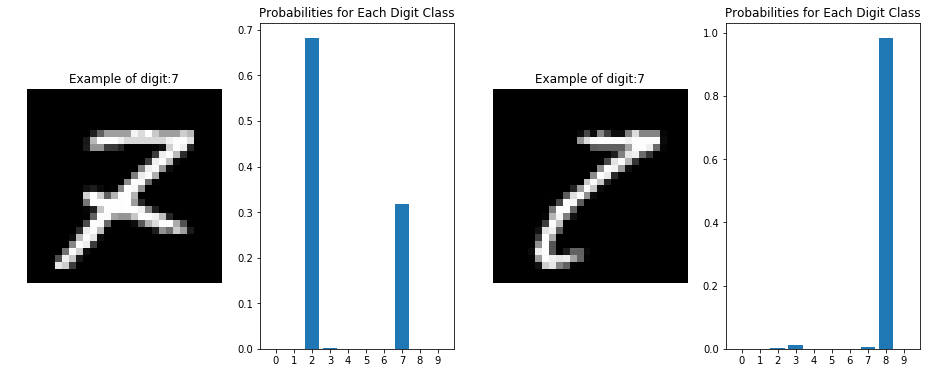

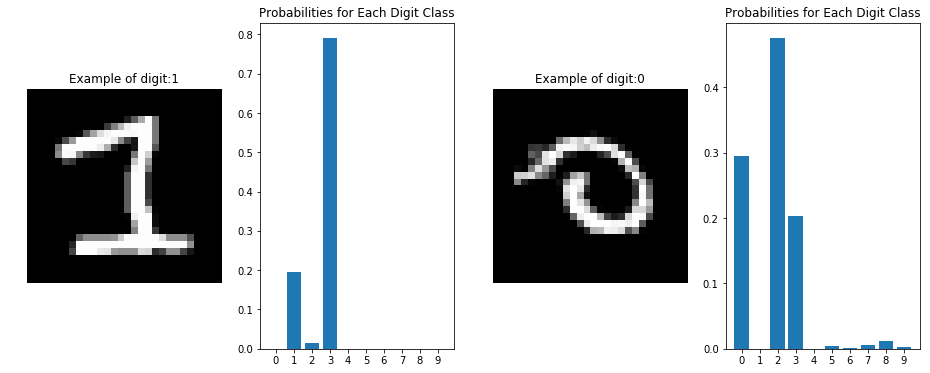

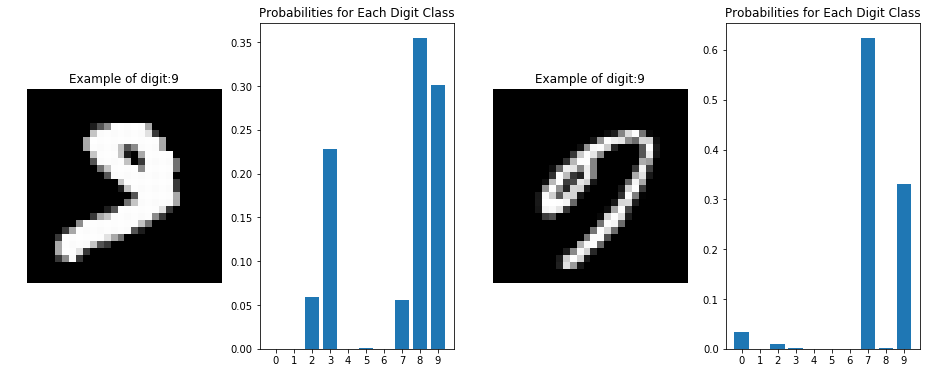

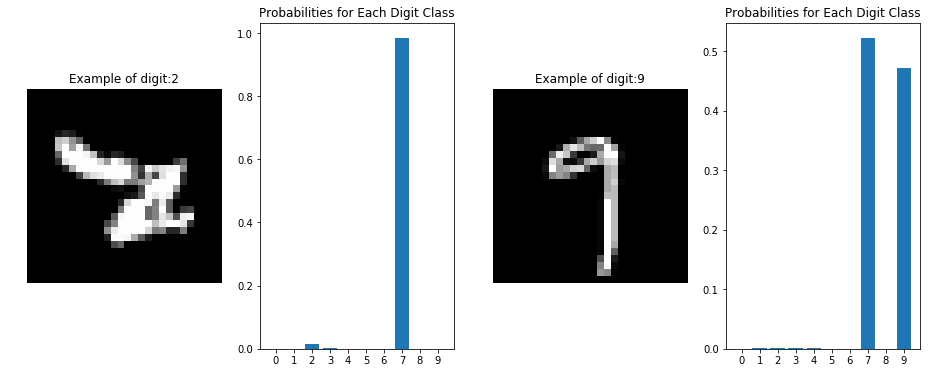

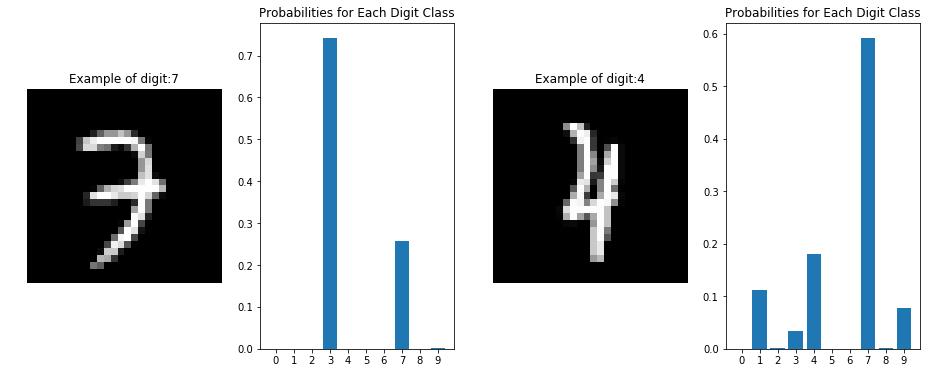

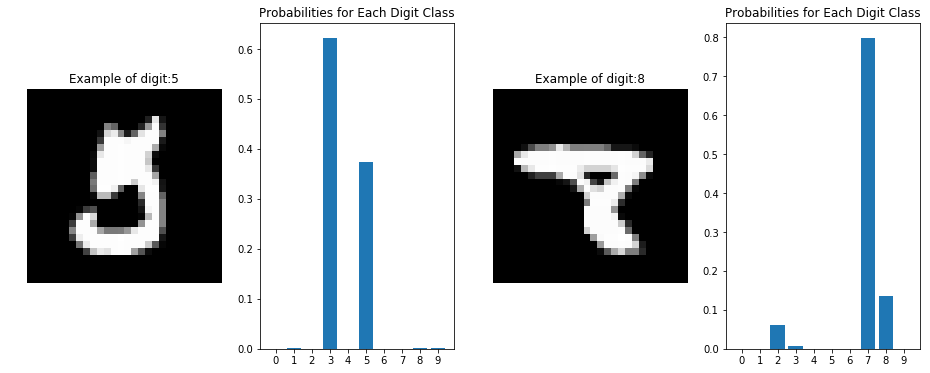

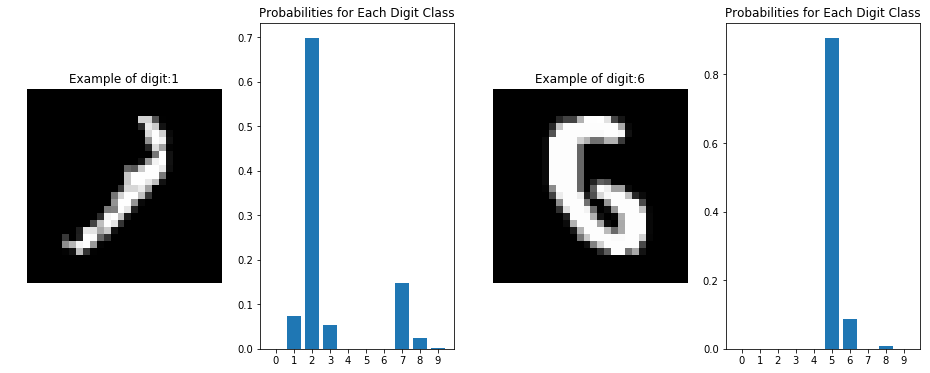

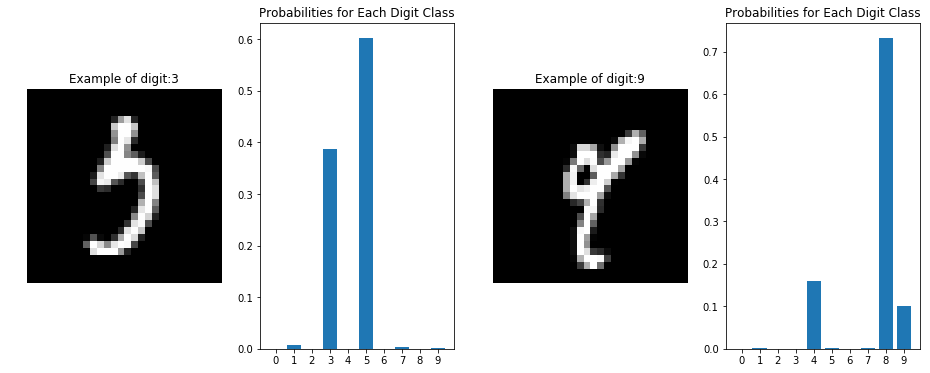

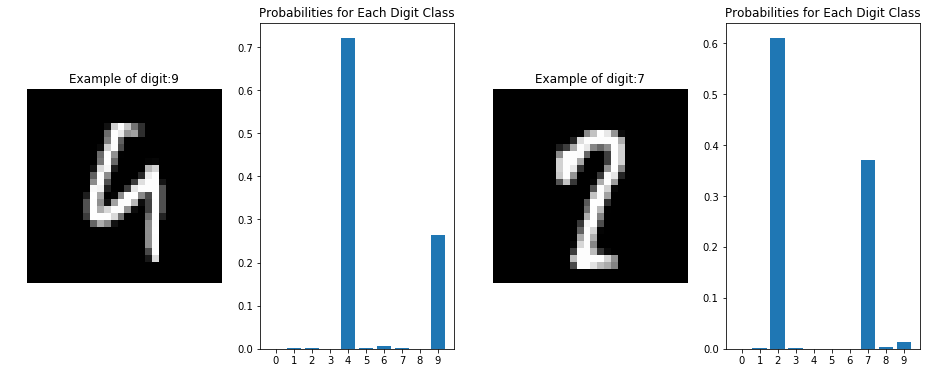

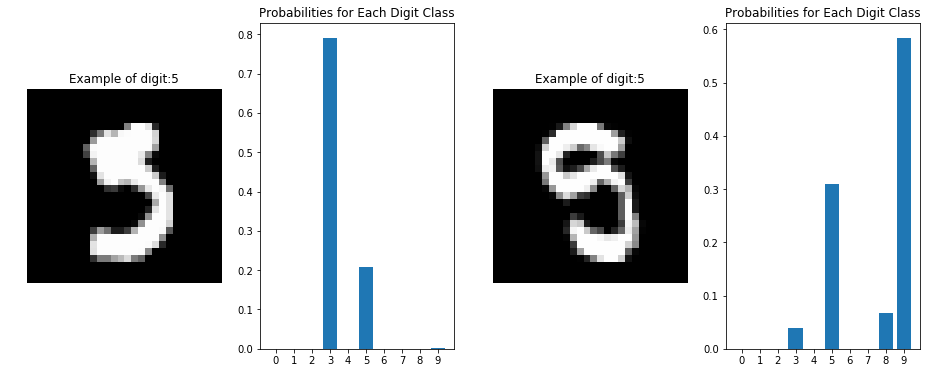

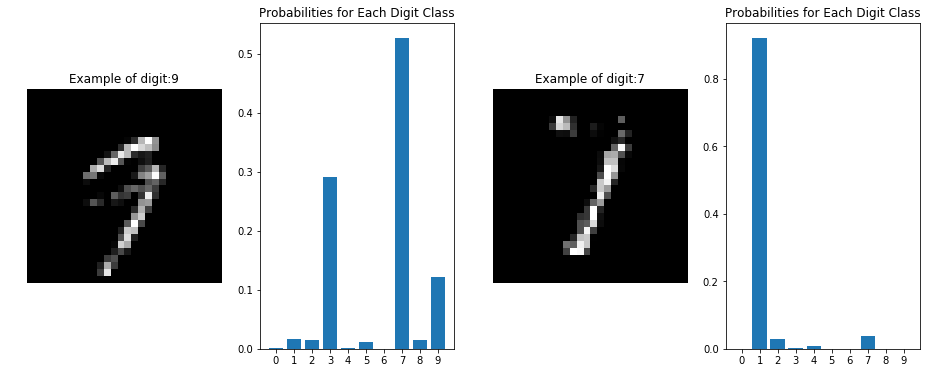

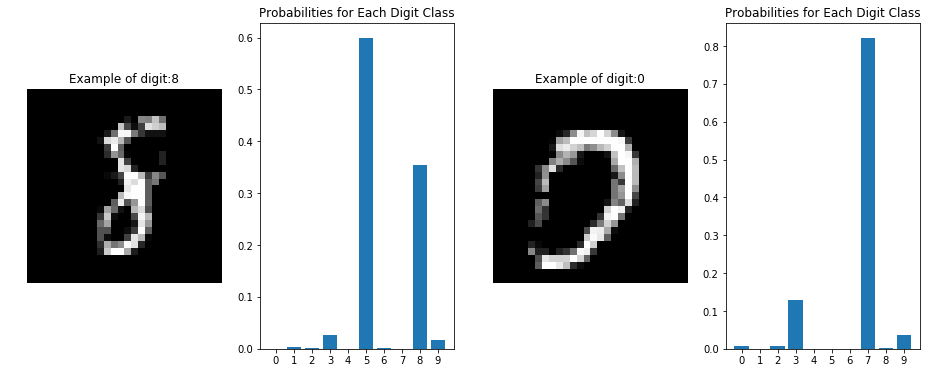

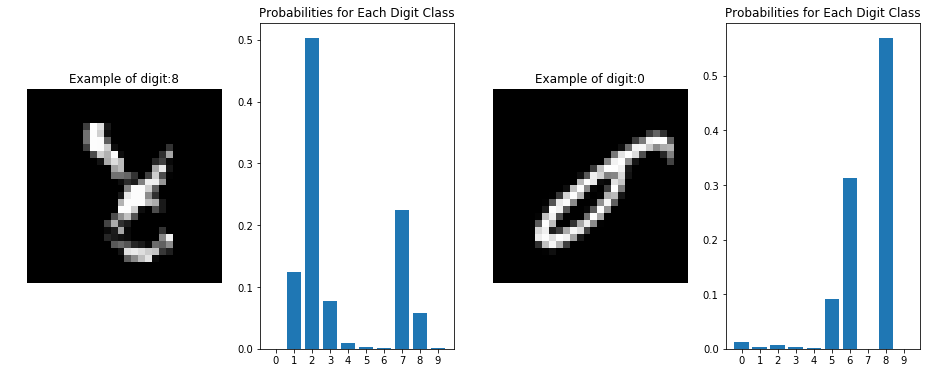

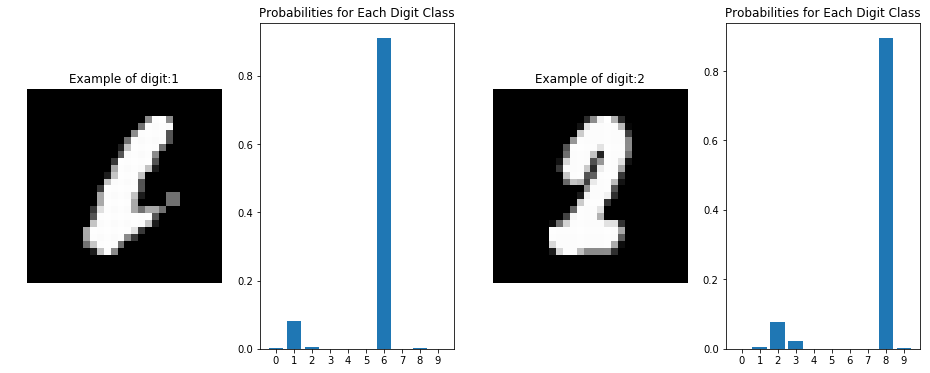

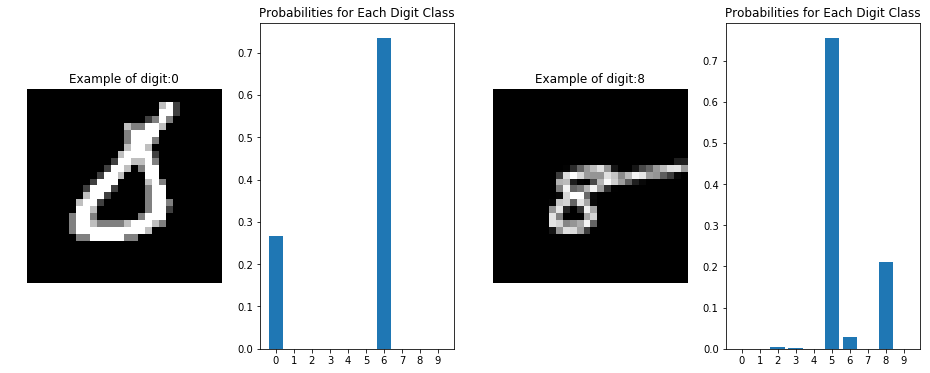

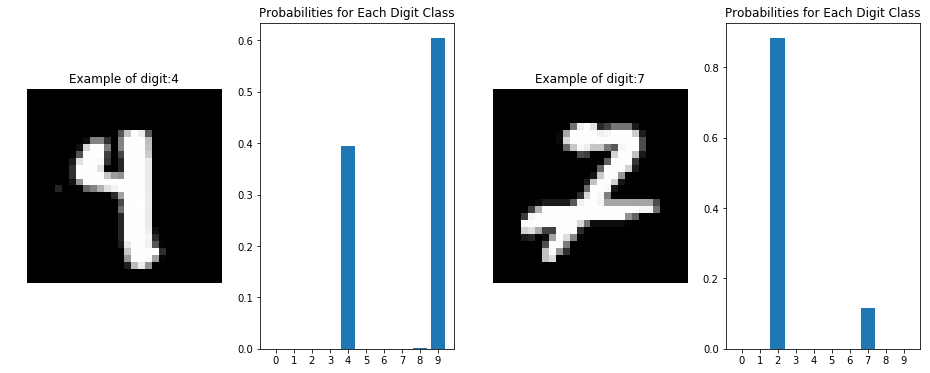

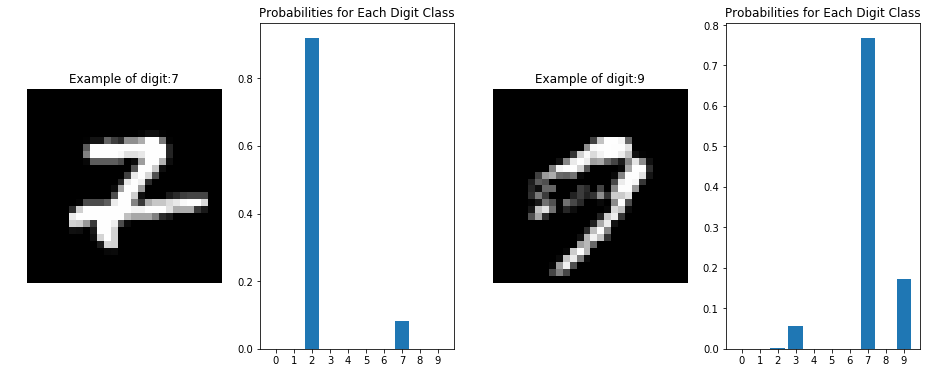

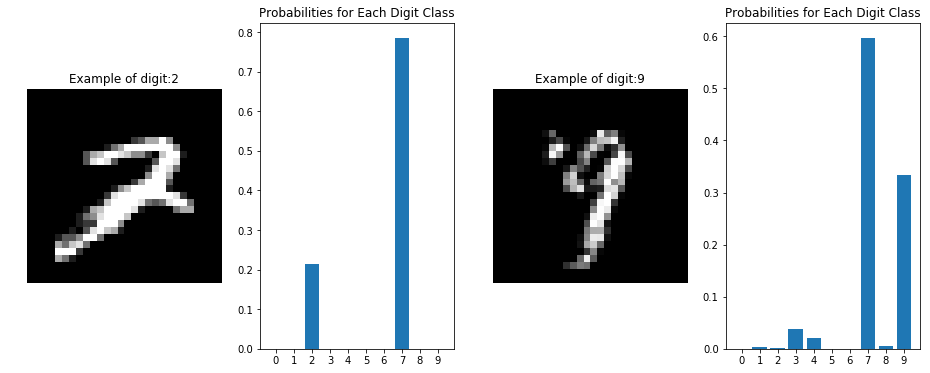

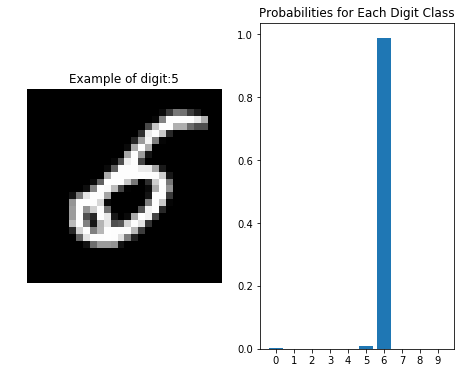

In [4]:
#作業 印出預測錯誤的資料
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_test_bk = X_test.copy()
X_test  = X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("0525CNN模型.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

print("Predicting ...")
Y_pred = model.predict_classes(X_test)   #分類
Y_probs = model.predict_proba(X_test)    #機率
# 建立錯分類錯誤的datafram物件
df = pd.DataFrame({'label:':Y_test , 'predict:':Y_pred})
df = df[Y_test != Y_pred]
    
#所有錯誤分類的數字索引
for a in range(0,len(df),2):
    i = df.index.values.astype(int)[a]
    digit = X_test_bk[i].reshape(28,28)   
#繪製圖表的預測結果
    plt.figure(figsize=[16,6])
    plt.subplot(1,4,1)                #4個是在排版
    plt.title("Example of digit:"+str(Y_test[i]))
    plt.imshow(digit, cmap='gray')
    plt.axis("off")
    plt.subplot(1,4,2)
    plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    if a < len(df)-1:                 #因為錯誤資料數是奇數個 最後一個會錯誤
        a=a+1
        i = df.index.values.astype(int)[a]
        digit = X_test_bk[i].reshape(28,28)   
        plt.subplot(1,4,3)
        plt.title("Example of digit:"+str(Y_test[i]))
        plt.imshow(digit, cmap='gray')
        plt.axis("off")
        plt.subplot(1,4,4)
        plt.title("Probabilities for Each Digit Class")
        plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
        plt.xticks(np.arange(10),np.arange(10).astype(str))
    plt.show()